In [166]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv('/Users/kimginam/Downloads/trainticket.csv')

In [168]:
df = df.drop(['price_tree', 'batch', 'id'], axis=1)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   insert_date  1000 non-null   object        
 1   origin       1000 non-null   object        
 2   destination  1000 non-null   object        
 3   start_date   1000 non-null   datetime64[ns]
 4   end_date     1000 non-null   object        
 5   train_type   1000 non-null   object        
 6   price        889 non-null    float64       
 7   train_class  999 non-null    object        
 8   fare         999 non-null    object        
 9   time_band    1000 non-null   category      
 10  Day_name     1000 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), object(8)
memory usage: 79.4+ KB


In [183]:
df.shape

(1000, 11)

In [169]:
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:30:00,2019-04-18 11:15:00,AVE,107.70,Turista,Flexible


### Time band

In [170]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['time_band'] = df['start_date'].apply(lambda x: x.strftime('%H%M'))

In [171]:
df['time_band'] = df['time_band'].astype(int)

In [172]:
df['time_band'].dtype

dtype('int64')

In [173]:
r = [0, 900, 1200, 1500, 1800, 2200]
g = [0,1,2,3,4]
df['time_band'] = pd.cut(df['time_band'], bins=r, labels=g)

In [174]:
df.loc[df['start_date'] == '2019-04-15 09:0:00']

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,time_band
265,2019-04-11 21:51:24,MADRID,SEVILLA,2019-04-15 09:00:00,2019-04-15 11:38:00,AVE,76.3,Turista,Flexible,0


### Visualization

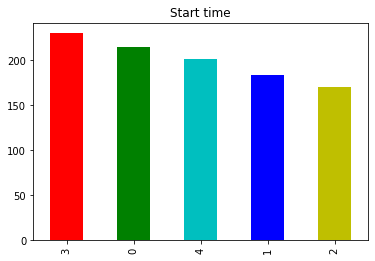

In [175]:
plt.title('Start time')
df['time_band'].value_counts().plot.bar(color=('r', 'g', 'c', 'b', 'y'))

In [176]:
df['time_band'].value_counts()

3    230
0    215
4    201
1    184
2    170
Name: time_band, dtype: int64

In [177]:
from datetime import datetime
df['Day_name'] = df['start_date'].dt.day_name()

In [178]:
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,time_band,Day_name
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo,0,Thursday
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo,0,Thursday
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo,0,Thursday
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo,0,Thursday
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:30:00,2019-04-18 11:15:00,AVE,107.70,Turista,Flexible,0,Thursday


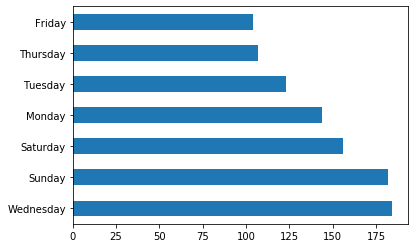

In [179]:
df['Day_name'].value_counts().plot.barh()

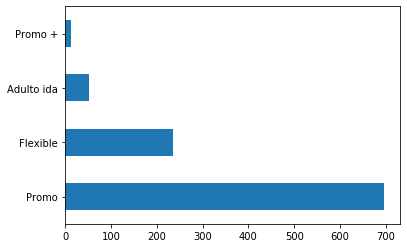

In [180]:
df['fare'].value_counts().plot.barh()

Text(0.5, 1.0, 'Total Missing Value (%)')

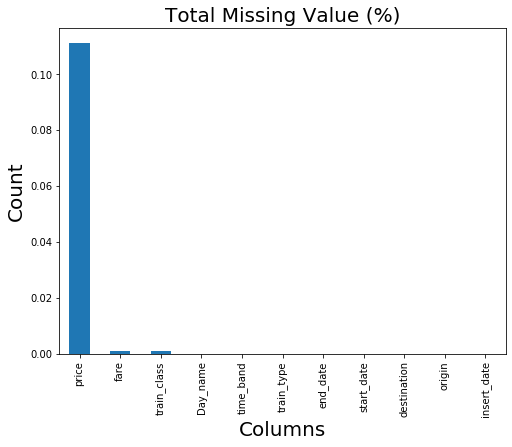

In [184]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

## Missing data processing 

In [185]:
train_fare = ['fare', 'train_class']
for i in train_fare:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [186]:
df.loc[df.price.isnull(), 'price'] = df.groupby('fare').price.transform('mean')

Text(0.5, 1.0, 'Total Missing Value (%)')

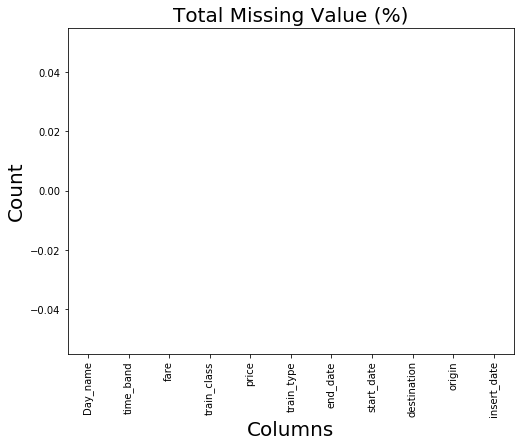

In [187]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [188]:
df.isnull().any()

insert_date    False
origin         False
destination    False
start_date     False
end_date       False
train_type     False
price          False
train_class    False
fare           False
time_band      False
Day_name       False
dtype: bool

## EDA 

In [195]:
cnt_srs = df['price'].value_counts()
trace1 = go.Scatter(
                    x = cnt_srs.index,
                    y = cnt_srs.values,
                    mode = "markers",
                    marker = dict(color = 'rgba(100, 35, 55, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Average price',
              xaxis= dict(title= 'Price',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
fig = go.Figure(data = data, layout = layout)
fig

In [190]:
df['end_date'] = pd.to_datetime(df['end_date'])

In [191]:
df['time_in_mins'] = df['end_date'] - df['start_date']
df['time_in_mins']=df['time_in_mins']/np.timedelta64(1,'m')

In [192]:
print('The average travelling time was {} mins \nThe maximum travelling time was {} mins \nThe minimum travelling time was {} mins'
      .format(df.time_in_mins.mean(),df.time_in_mins.max(),df.time_in_mins.min()))

The average travelling time was 177.805 mins 
The maximum travelling time was 562.0 mins 
The minimum travelling time was 100.0 mins


In [196]:
cnt_srs = df['time_in_mins'].value_counts()
trace1 = go.Scatter(
x = cnt_srs.index,
y = cnt_srs.values,
mode = "markers",
marker = dict(color = 'rgba(100, 35, 55, 0.8)')
)
data = [trace1]
layout = dict(title = 'Journeys started according to hour',
xaxis= dict(title= 'Journeys per hour',ticklen= 5,zeroline= False)
)
fig = go.Figure(data = data, layout = layout)
fig

In [197]:
from plotly.offline import init_notebook_mode, iplot

cnt_ = df['train_type'].value_counts()

fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Train types",
      "hoverinfo":"label+percent+name",
      "hole": .5,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart Train types",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Pie Chart",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [198]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df.groupby('destination')['price'].agg(['mean'])
cnt_srs.columns = ["mean"]
cnt_srs = cnt_srs.sort_values(by="mean", ascending=False)
trace0 = horizontal_bar_chart(cnt_srs['mean'], 'rgba(50, 71, 96, 0.6)')
fig = go.Figure(data = trace0, layout = layout)
fig